<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Lab11: A2_Elbow Curve and `sklearn.cluster.KMeans`

Based on *Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017


In [23]:
%matplotlib inline

from IPython.display import Image
import matplotlib.pyplot as plt

# Grouping objects by similarity using k-means

## K-means clustering using scikit-learn

Using the following code lines, you can generate two-dimensional data clusters that can
be used for testing clustering algorithms. In this exercise, you will learn how to apply
k-means and how to determine the optimum number of clusters using the elbow
criterium of the inertia plot.

### (a) Scatterplot
Generate a distribution of 8 clusters with 250 samples and plot them as a scatterplot.
How many clusters do you recognize with your eye. Try to change the cluster standard
deviation cluster_std until it will be hard for you to discriminate the 8 different clusters.

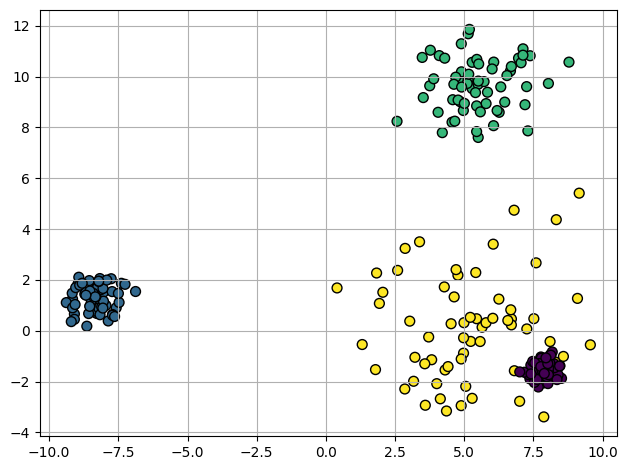

In [24]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples=250
n_features=8
X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=4, 
                  cluster_std=1*np.array([0.3,0.5,1.2,2]), 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 7], X[:, 4], c=y, marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

### b) `KMeans`
Import the method `KMeans` from `sklearn.cluster`. Instantiate a model km with 8 clusters
(`n_clusters=8`). Set the maximum number of iterations to `max_iter=300` and `n_init=10`.

Fit the model to the data and predict the cluster label using `km.fit_predict(X)`.
Hint: One way to deal with convergence problems is to choose larger values for `tol`, which
is a parameter that controls the tolerance with regard to the changes in the within-cluster
sum-squared-error to declare convergence. Try a tolerance of 1e-04.

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
print(km.score(X))
print(km.inertia_)


-2011.464942201058
2011.464942201058


### (c) Display the clustered data

Use the function `PlotClusters` to display the clustered data.

In [26]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
ColorNames=list(colors.keys())
HSV=colors.values()


def PlotClusters(X,y, km):
    print("%i clusters" % km.n_clusters)
    plt.figure()
    for ClusterNumber in range(km.n_clusters):
        plt.scatter(X[y == ClusterNumber, 0],
                X[y == ClusterNumber, 1],
                s=50, c=ColorNames[ClusterNumber+1],
                marker='s', edgecolor='black',
                label='cluster {0}'.format(ClusterNumber+1))
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    #plt.savefig('images/11_02.png', dpi=300)
    plt.show()


### d) Variation of the number k of clusters 

Vary the number of clusters `n_clusters=8` in your `KMeans` clustering algorithm from 4 to
8 and display each time the result using the function `PlotClusters`.

2 clusters


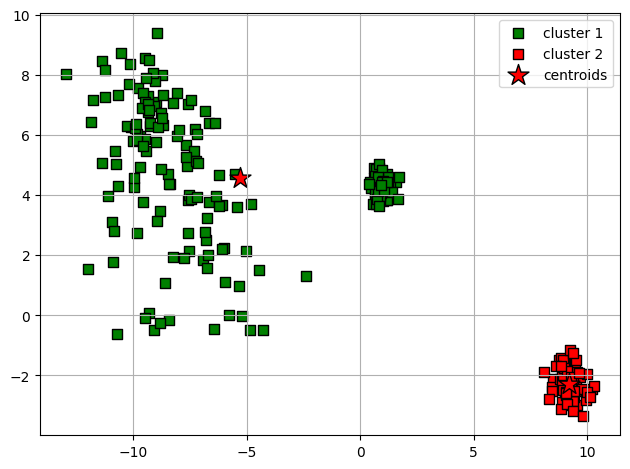

3 clusters


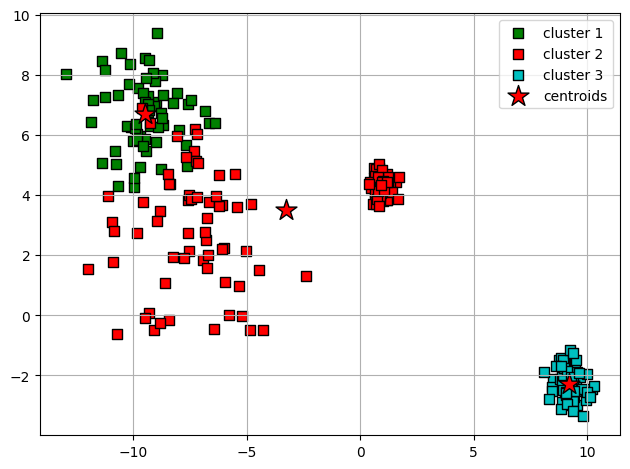

4 clusters


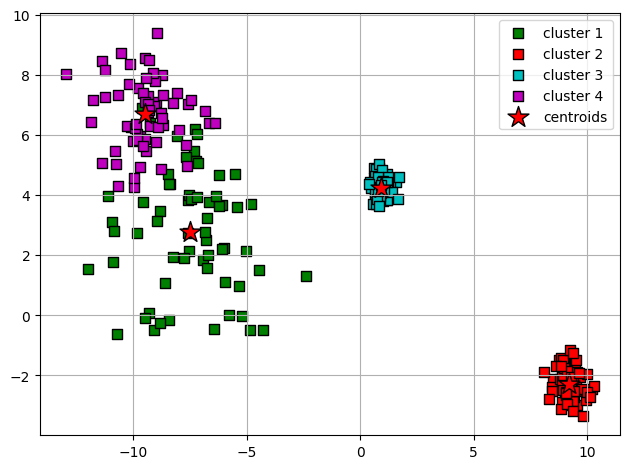

5 clusters


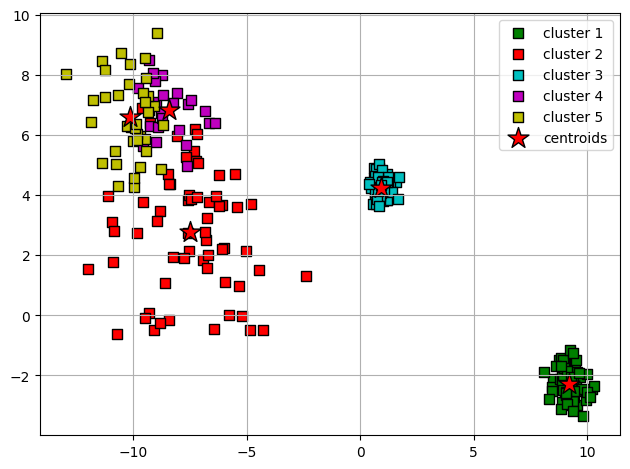

6 clusters


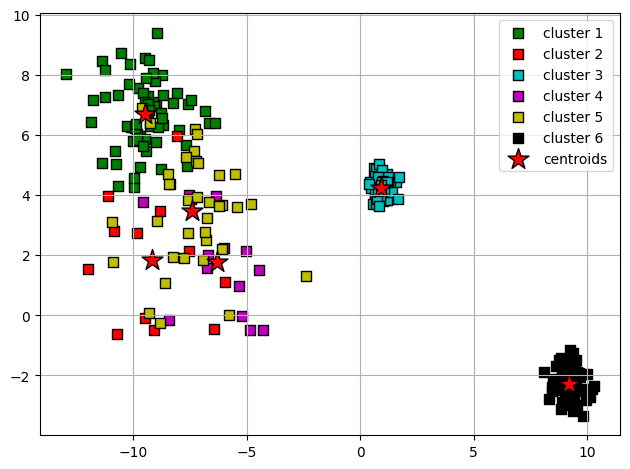

7 clusters


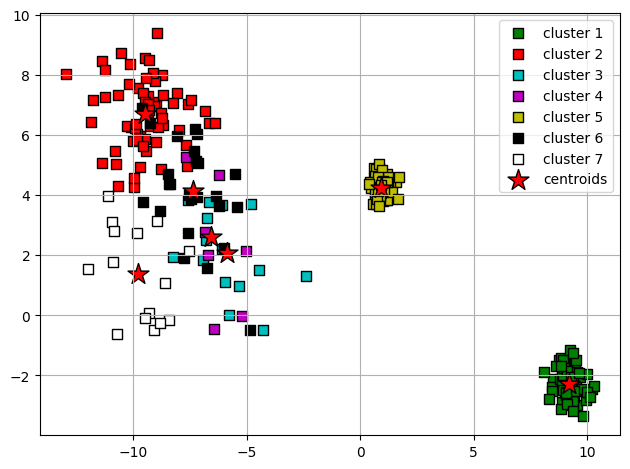

8 clusters


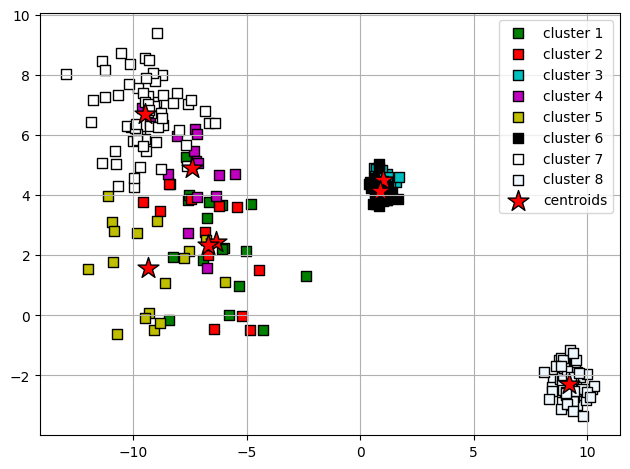

In [27]:

for n_clusters in range(2,9):
    km = KMeans(n_clusters=n_clusters,
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    PlotClusters(X,y_km, km)


<br>

## Using the elbow method to find the optimal number of clusters 

### (e) Elbow Method
Vary in a for loop the number of clusters from `n_clusters=8` to `n_clusters=15` and
cluster the data each time using the `km.fit_predict` method. Read out the inertia
`km.inertia_` and store it in a list called `distortions` as function of the number of clusters
using the `append` method. Display the inertia as function of the number of clusters
and determine the optimum number of clusters from the elbow curve.

In [28]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 2171.43


In [29]:
km.inertia_

2171.432865584105

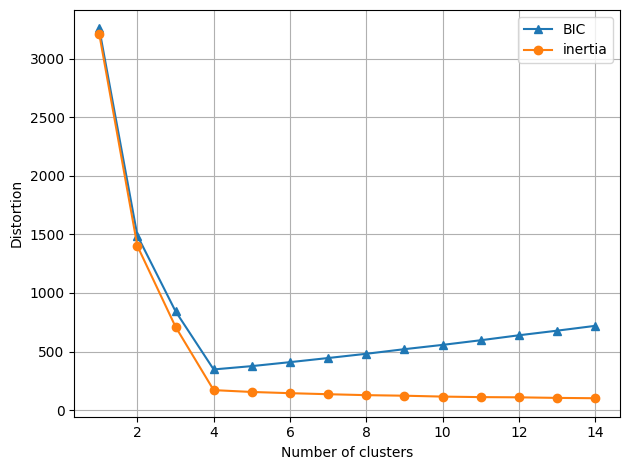

In [30]:
import numpy as np
distortions = []
ScoreList   = []
InertiaList = []
maxNumberOfClusters=15

for k in range(1, maxNumberOfClusters):
    km = KMeans(n_clusters=k, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    BIC=-km.score(X)/np.sqrt(n_samples)+np.log(n_samples)*n_features*k
    ScoreList.append(BIC)
    InertiaList.append(-km.score(X)/np.sqrt(n_samples))
   
    
#plt.semilogy(range(1, maxNumberOfClusters), distortions, marker='o')
plt.plot(range(1, maxNumberOfClusters), ScoreList, marker='^',label='BIC')
plt.plot(range(1, maxNumberOfClusters), InertiaList, marker='o',label='inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.legend()
plt.tight_layout()
plt.grid(True)
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

### (f) kMeans++

Without explicit defintion, a random seed is used to place the initial centroids, which
can sometimes result in bad clusterings or slow convergence. Another strategy is to place
the initial centroids far away from each other via the k-means++ algorithm, which leads
to better and more consistent results than the classic k-means. This can be selected in
`sklearn.cluster.KMeans` by setting `init=k-means++`.

* D. Arthur and S. Vassilvitskii. k-means++: The Advantages of Careful Seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027–1035. Society for Industrial and Applied Mathematics, 2007). http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf


<br>

4 clusters


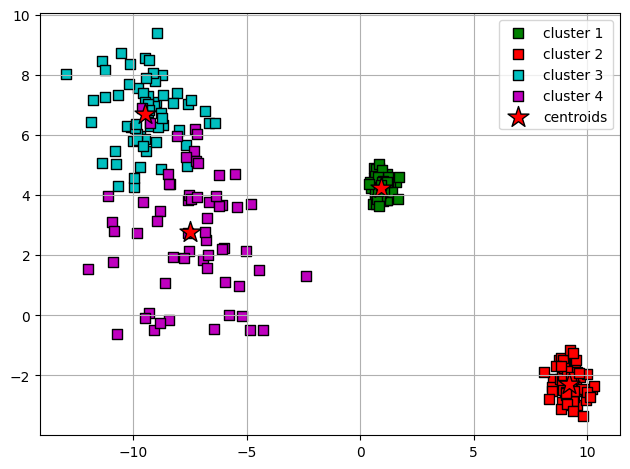

5 clusters


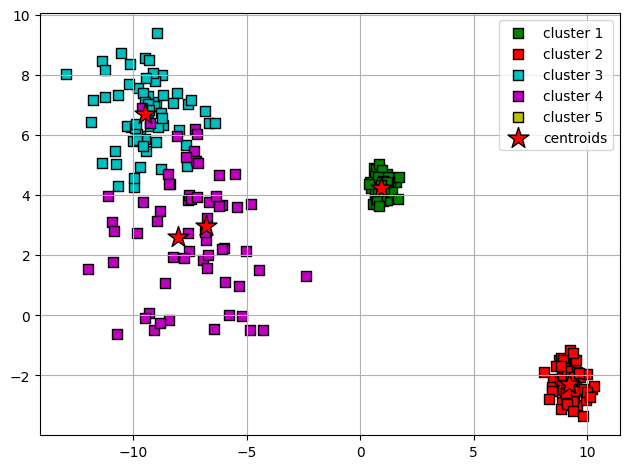

6 clusters


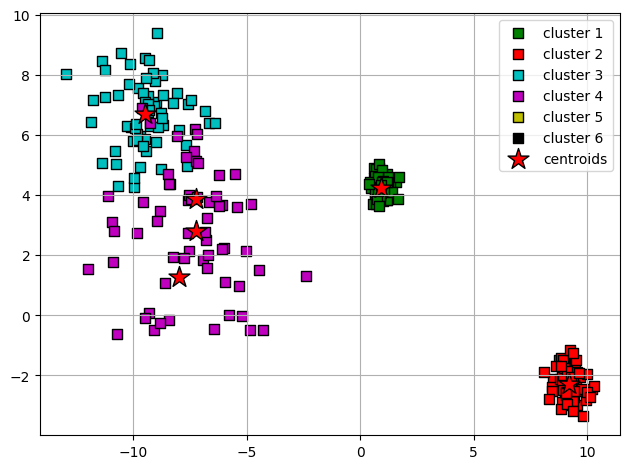

7 clusters


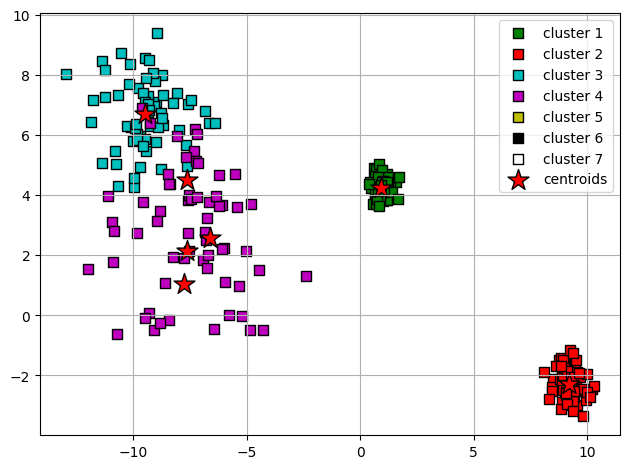

8 clusters


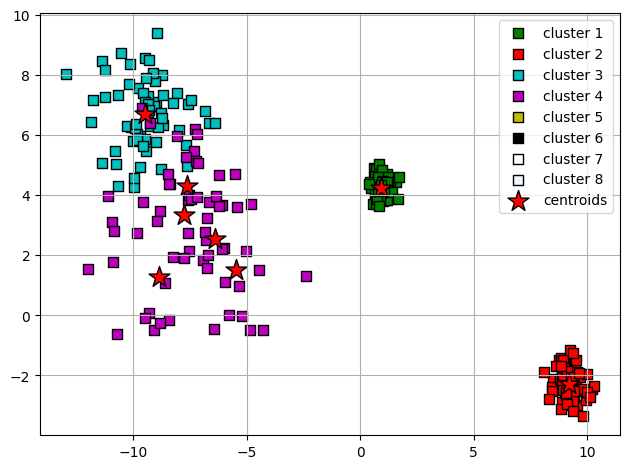

In [31]:
for n_clusters in range(4,9):
    km = KMeans(n_clusters=n_clusters,
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    PlotClusters(X,y, km)

# Bonus

## Quantifying the quality of clustering  via silhouette plots

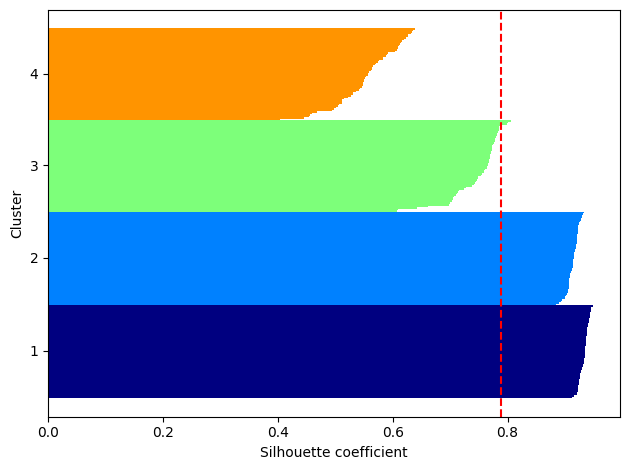

0.7889260700729956


In [32]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()
print(silhouette_avg)

Comparison to "bad" clustering:

8 clusters


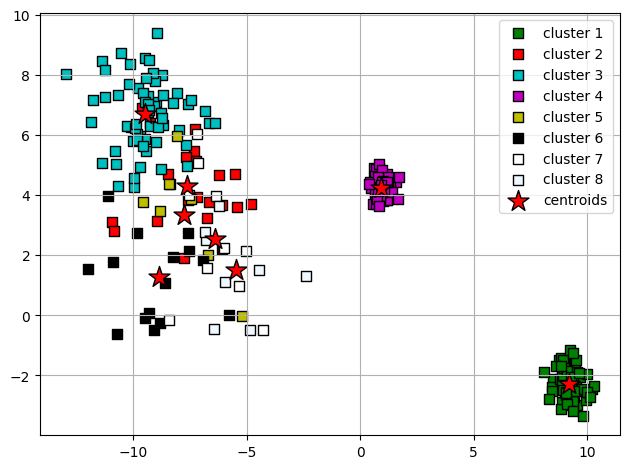

In [33]:
km = KMeans(n_clusters=8,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

PlotClusters(X,y_km, km)


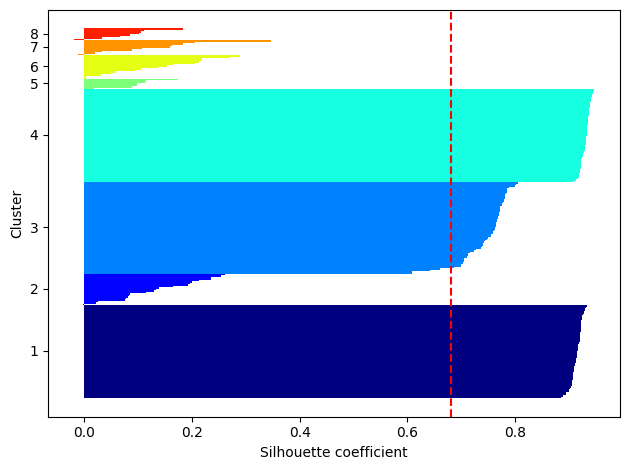

In [34]:
import numpy as np

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

<br>
<br>

# Organizing clusters as a hierarchical tree

## Grouping clusters in bottom-up fashion

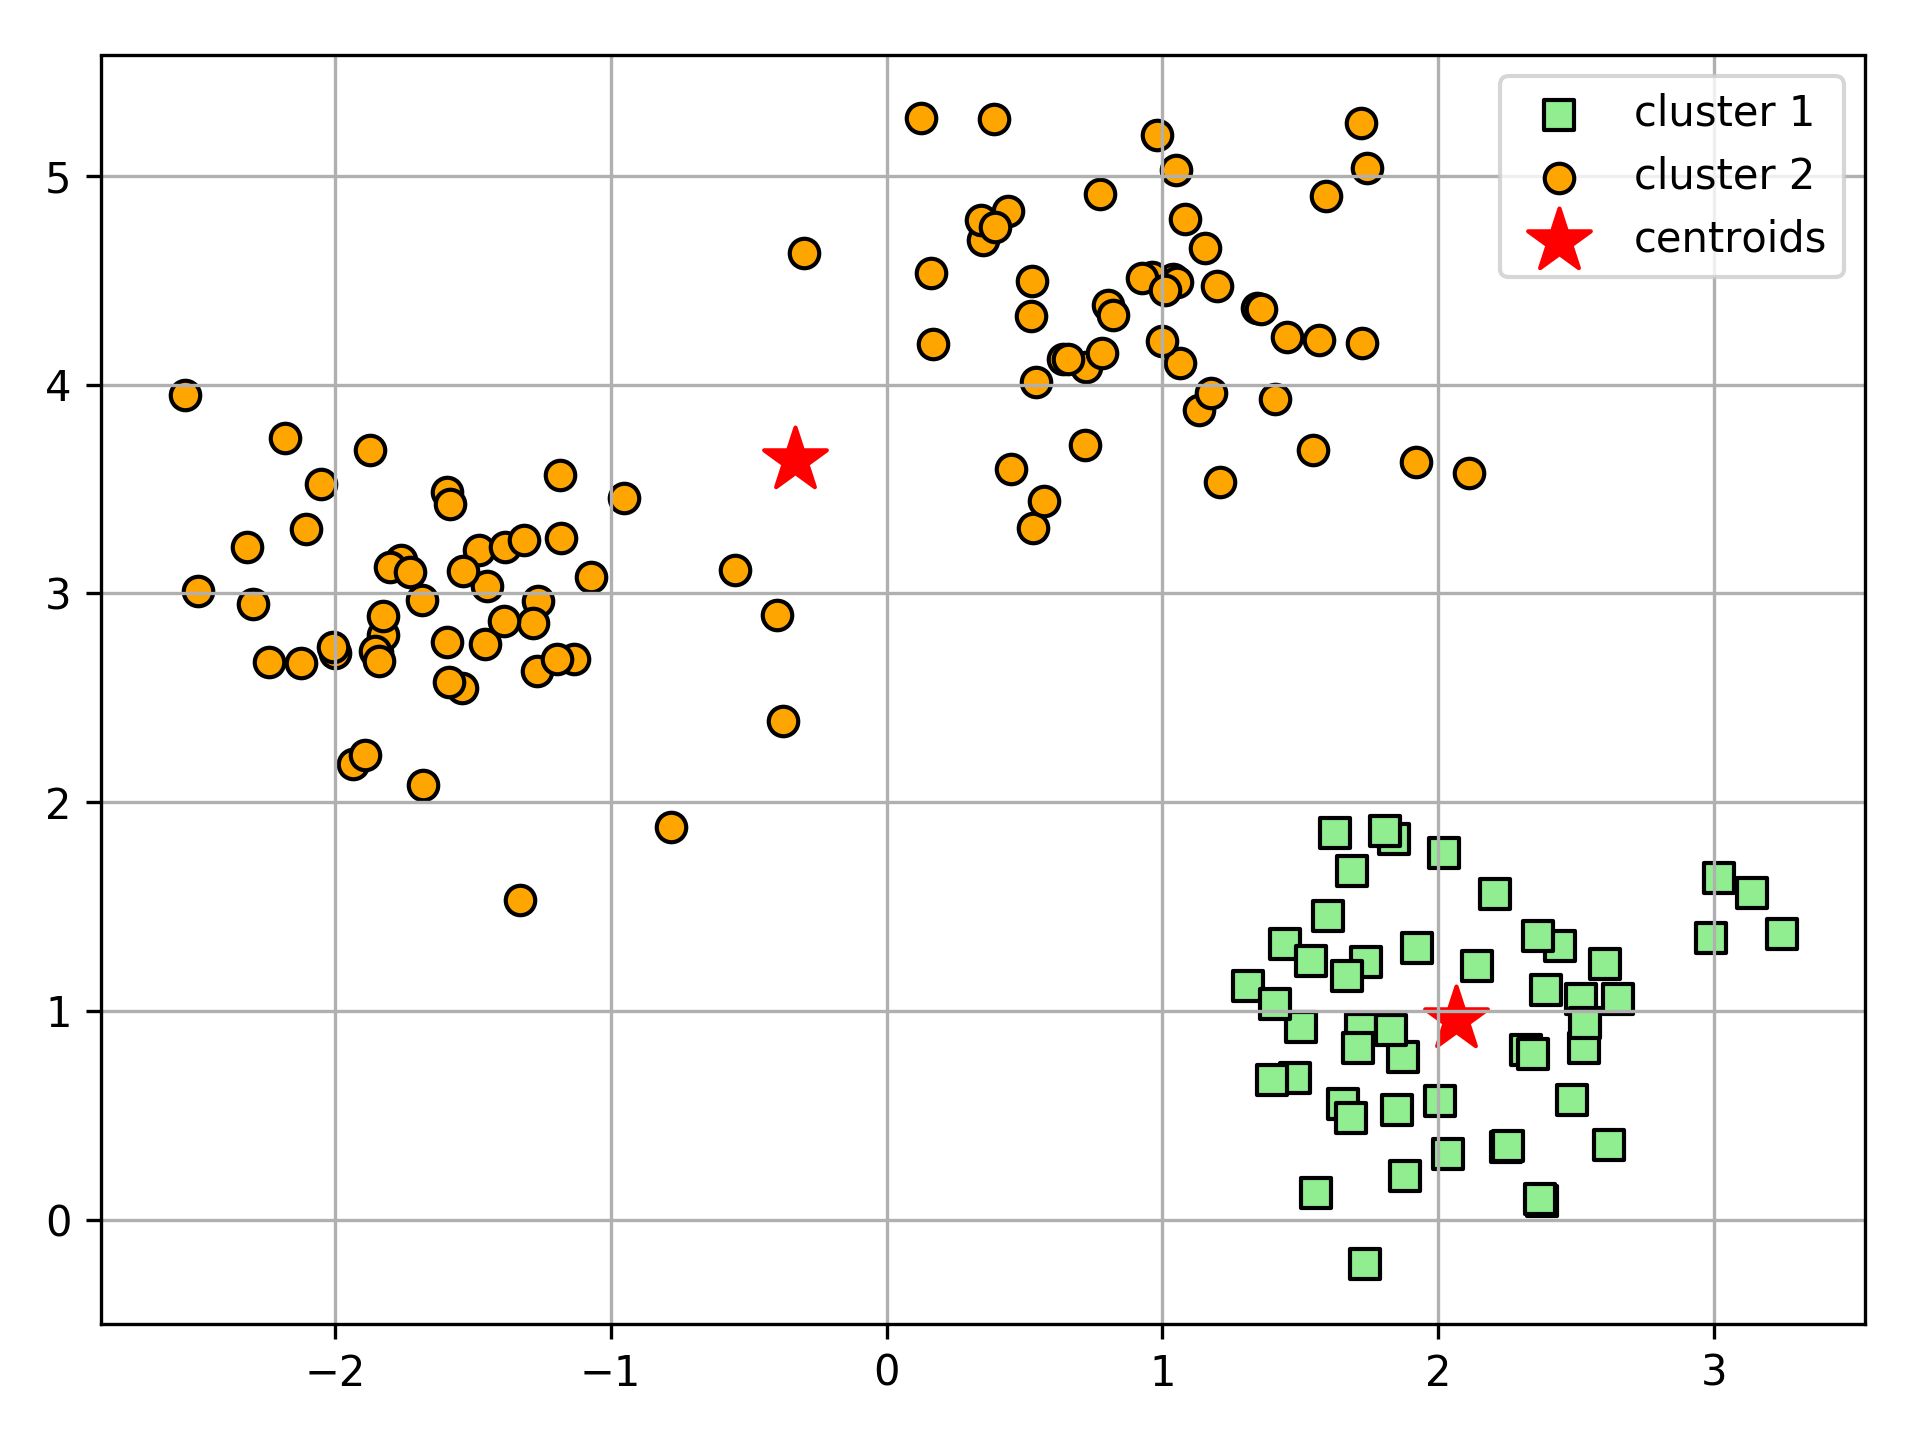

In [35]:
Image(filename='./images/11_05.png', width=400) 

In [36]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

## Performing hierarchical clustering on a distance matrix

In [37]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [38]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_7096/2003895268.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [39]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [40]:
# 3. correct approach: Input sample matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')

pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


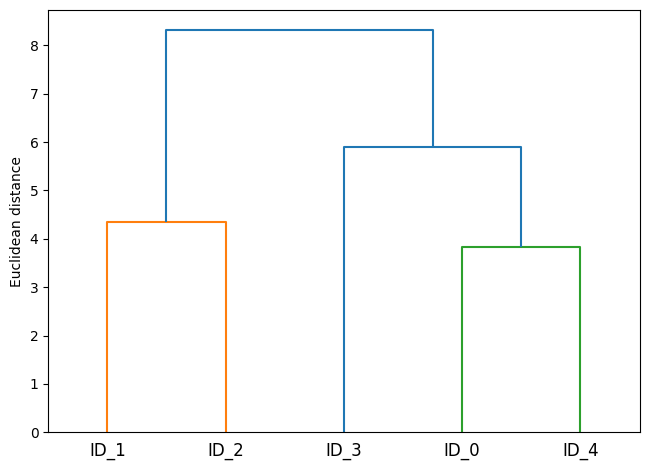

In [41]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

## Attaching dendrograms to a heat map

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_7096/2216965141.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_7096/2216965141.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


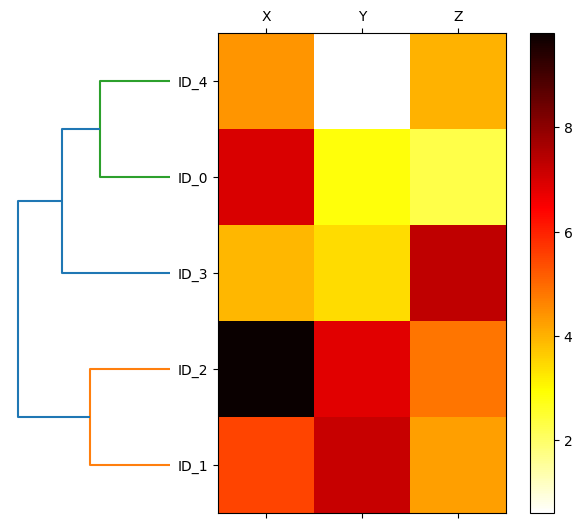

In [42]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

<br>

## Applying agglomerative clustering via scikit-learn

In [43]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             # affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [44]:
ac = AgglomerativeClustering(n_clusters=2, 
                             # affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


<br>
<br>

# Locating regions of high density via DBSCAN

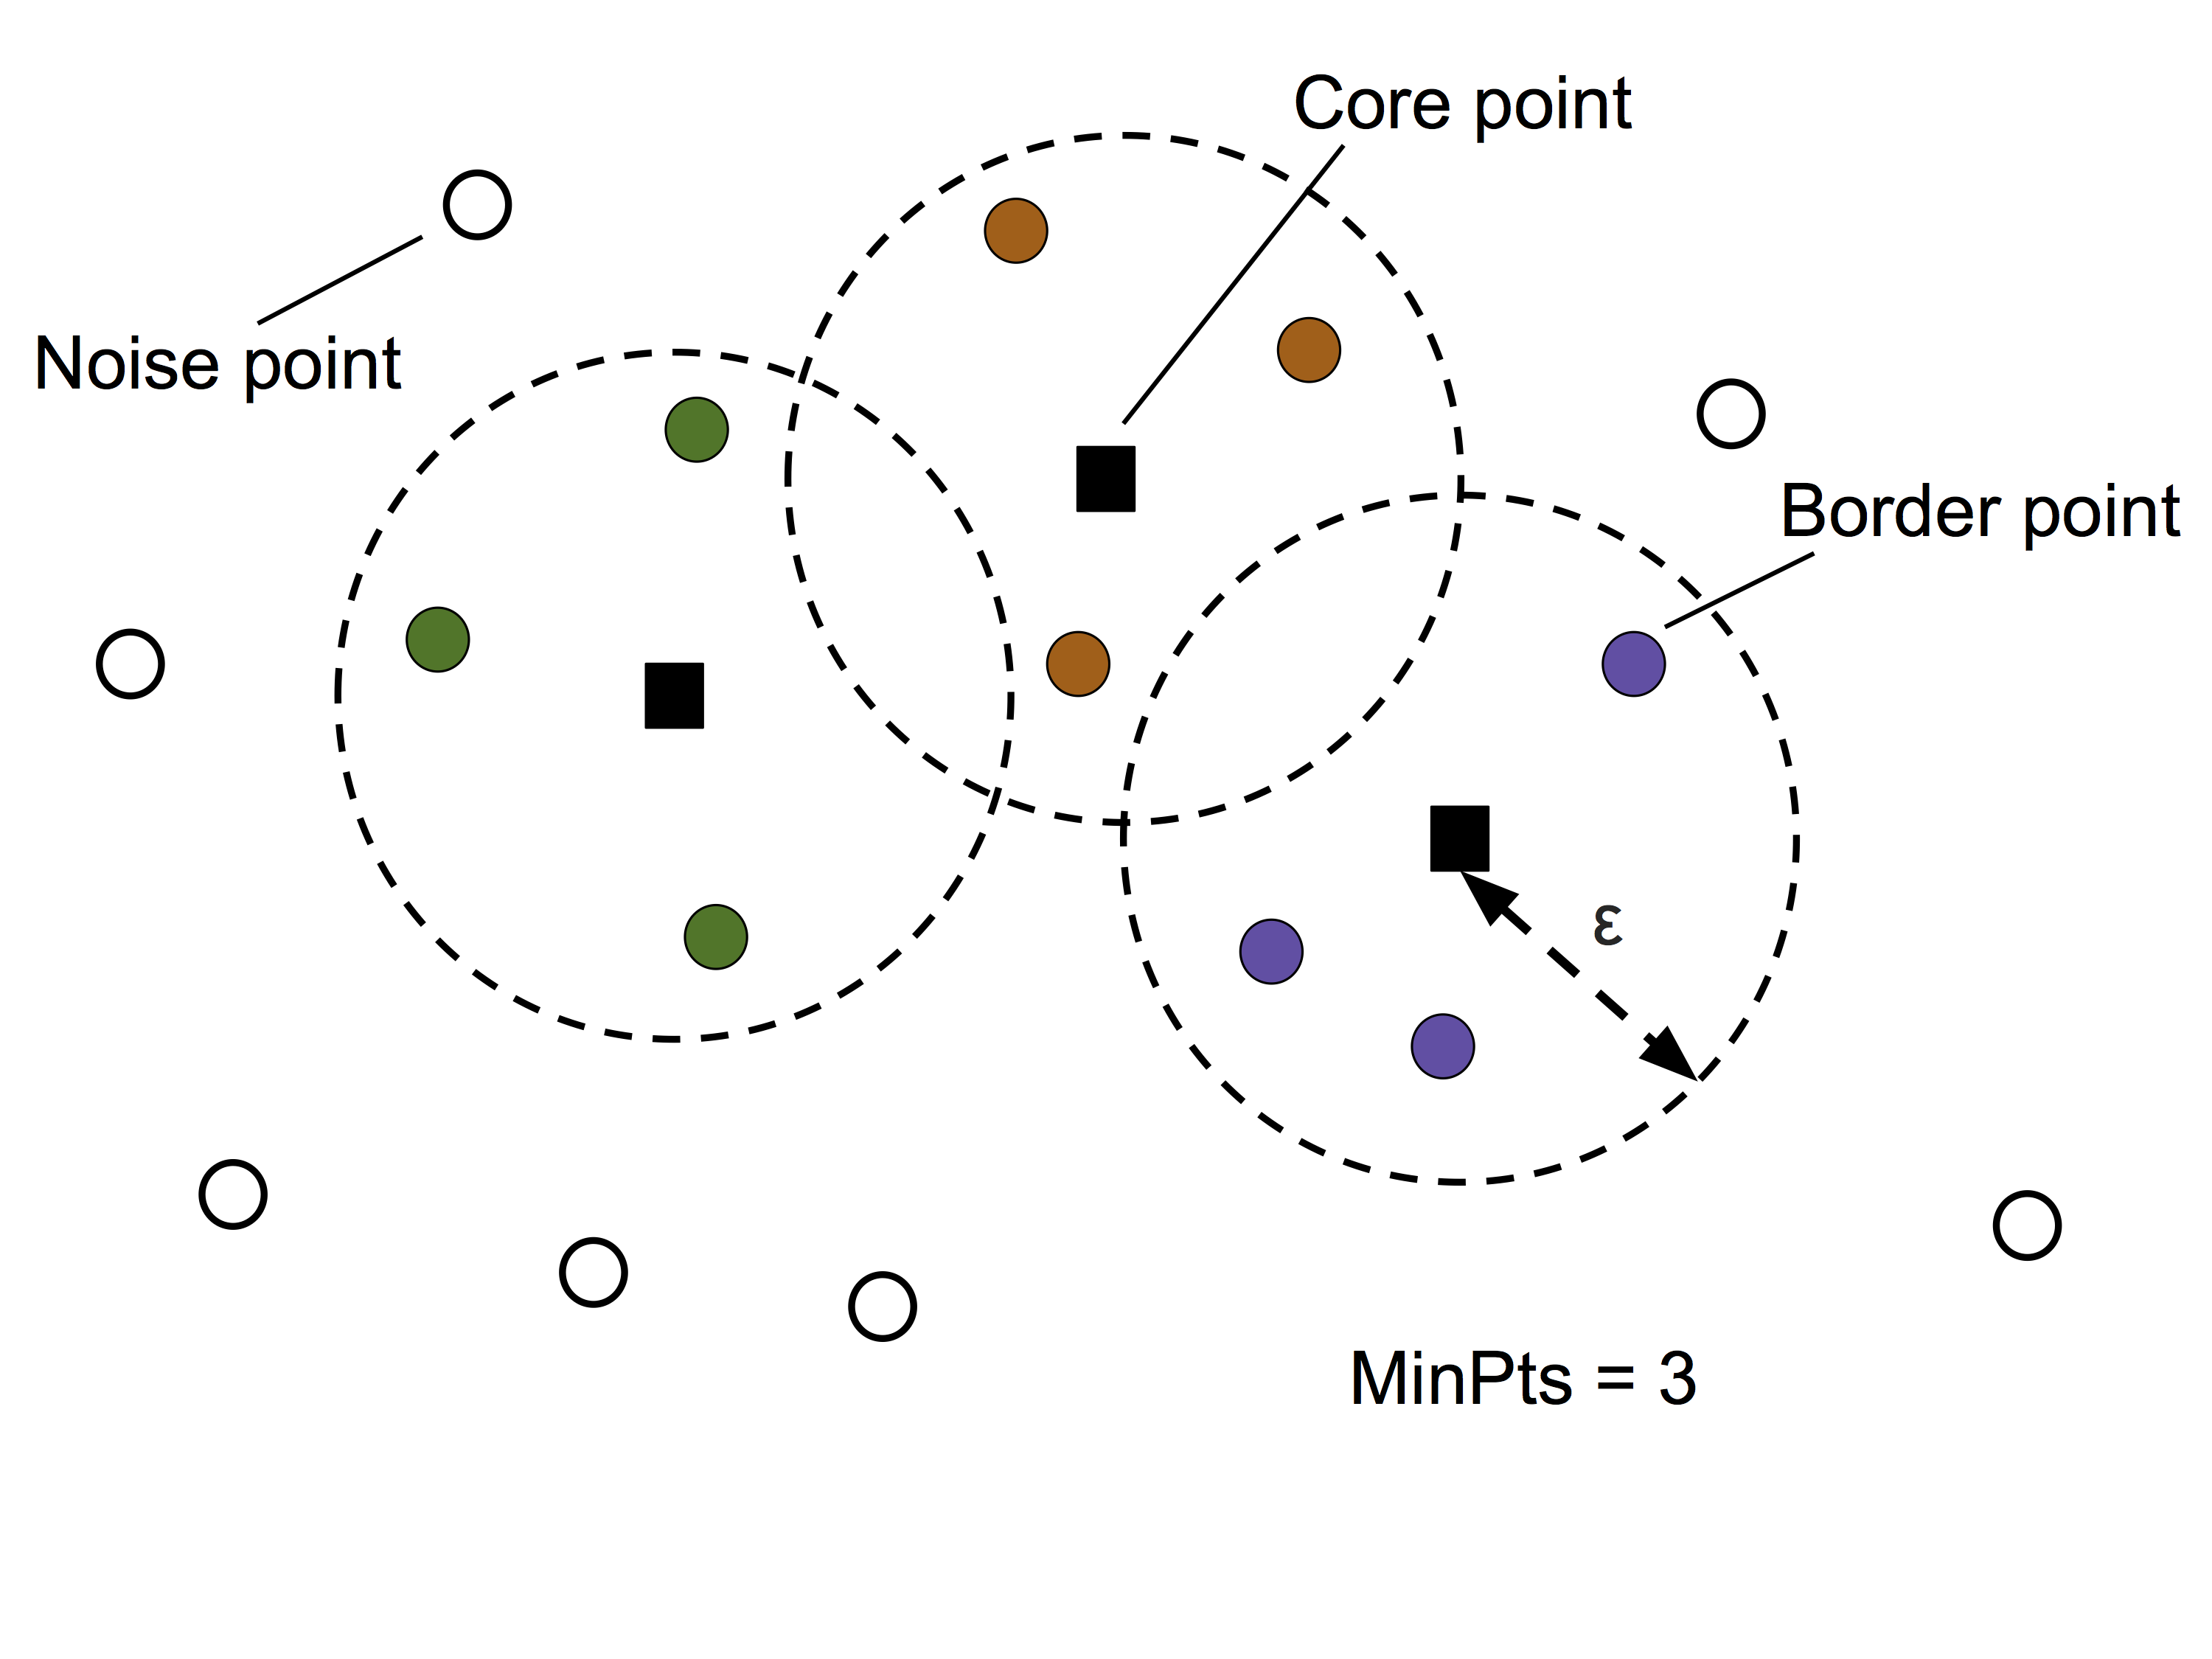

In [45]:
Image(filename='images/11_13.png', width=500) 

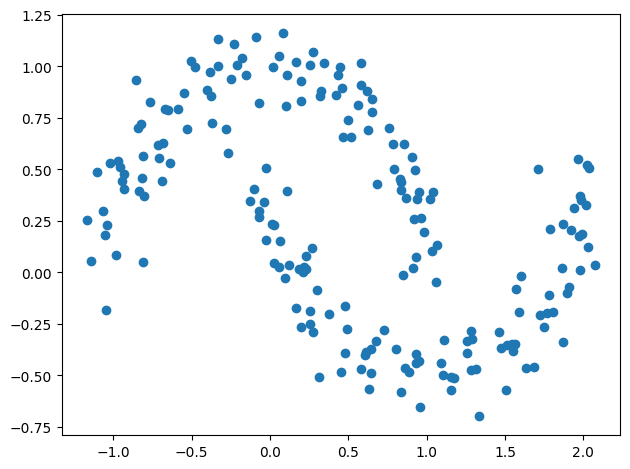

In [46]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

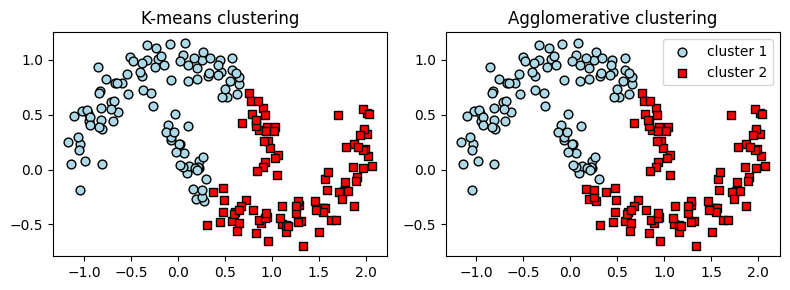

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             # affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

Density-based clustering:

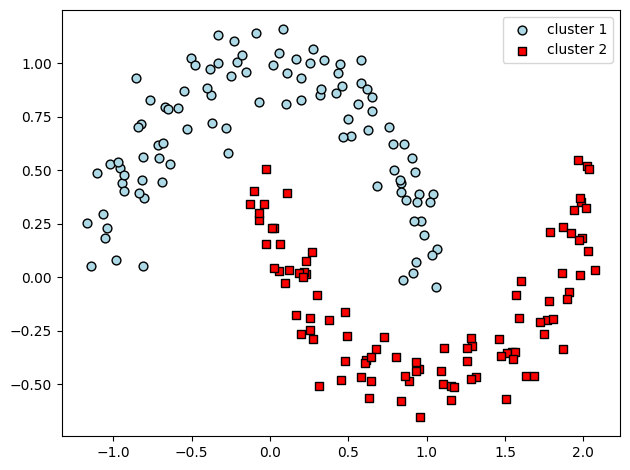

In [49]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

In [ ]:
y_db

<br>
<br>